# 2.5 Automatic Differentiation 自动微分

## 2.5.1 A Simple Function

In [40]:
import torch

In [41]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [42]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [43]:
y = 2 * torch.dot(x, x) # 2*(0+1+4+9)
y

tensor(28., grad_fn=<MulBackward0>)

In [44]:
y.backward()
# y = 2xTx
# y' = 4x
x.grad

tensor([ 0.,  4.,  8., 12.])

In [45]:
x.grad == 4*x

tensor([True, True, True, True])

Note that PyTorch does not automatically reset the gradient buffer when we record a new gradient. 

Instead, the new gradient **is added to the already-stored gradient**. 

This behavior comes in handy when we want to optimize the sum of multiple objective functions. 

In [46]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## 2.5.2 Backward for Non-Scalar Variables 非标量的反向传播

PyTorch 通过自动微分 (automatic differentiation) 实现了反向传播 (backpropagation) 的过程。在 PyTorch 中，反向传播的核心是 torch.autograd 模块，它能够自动计算神经网络中张量的梯度。这是通过维护一个动态计算图（computational graph）实现的。

以下是 PyTorch 中反向传播的工作原理的详细过程：

1. 计算图的构建
在前向传播 (forward pass) 过程中，PyTorch 会自动构建一个计算图，这个图描述了张量之间的计算关系。
在这个图中，每个节点是一个张量，每条边表示的是这些张量之间的操作。每当你对张量进行操作时，PyTorch 都会记录这些操作，并将它们添加到计算图中。
节点 (Node): 代表张量，特别是有 requires_grad=True 的张量，这意味着需要计算这些张量的梯度。
边 (Edge): 代表张量之间的操作，如加法、乘法、矩阵乘法等。

2. 计算损失函数
前向传播完成后，我们通常会计算一个损失函数 (loss function)，它用来衡量模型的输出与目标之间的差距。这个损失函数也是计算图的一部分。

3. 反向传播 (Backward Pass)
反向传播的核心是通过链式法则 (chain rule) 计算每个参数对损失函数的梯度。在 PyTorch 中，你可以通过调用 loss.backward() 方法触发反向传播，这会执行以下步骤：
计算梯度: 从损失函数开始，PyTorch 通过链式法则自动计算各个参数的梯度。这个过程是递归进行的，从输出层开始逐步回溯到输入层。
具体地，PyTorch 从损失函数对输出的导数开始，然后沿着计算图反向传播，逐个计算各个中间变量和输入变量的梯度。
存储梯度: 计算出来的梯度会被存储在每个张量的 .grad 属性中。需要注意的是，只有设置了 requires_grad=True 的张量才会被计算和存储梯度。

4. 梯度更新
反向传播完成后，通常会使用优化器（如 SGD、Adam 等）来更新模型的参数。优化器会使用这些计算得到的梯度来更新模型的参数，从而最小化损失函数。

5. 清除计算图
为了节省内存和提高计算效率，PyTorch 默认在每次调用 .backward() 之后会释放计算图。这样做是因为大部分情况下，计算图只会在每次前向传播中使用一次。如果需要保留计算图（例如在 RNN 中），可以将 retain_graph=True 传递给 .backward() 方法。

在这个例子中，z 是由 x 和 y 计算得来的张量。loss.backward() 调用之后，PyTorch 自动计算出 x 和 y 对 loss 的梯度，并将结果保存在 x.grad 和 y.grad 中。

总结来说，PyTorch 的反向传播是通过自动微分技术和动态计算图实现的，它能够高效地计算出各个参数的梯度，并且极大地简化了深度学习模型的训练过程。

In [47]:
# 创建张量
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# 前向传播：计算图的构建
z = x * y + y**2

# 计算损失
loss = z

# 反向传播：计算梯度
loss.backward()

# 输出梯度
print(x.grad)  # 对 x 的梯度
print(y.grad)  # 对 y 的梯度

tensor(3.)
tensor(8.)


In [49]:
x = torch.arange(4.0, requires_grad=True)
y = 2 * torch.dot(x, x)

y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## 2.5.3 Detaching Computation 分离计算

In [53]:
x.grad.zero_()
y = x * x
u = y.detach()
u

tensor([0., 1., 4., 9.])

In [55]:
z = u * x
z

tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>)

In [57]:
z == x*x*x

tensor([True, True, True, True])

In [51]:
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [52]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## 2.5.6 Exercises

2. 在运行反向传播函数之后，立即再次运行它，看看会发生什么。

In [66]:
a = torch.tensor([1.0, 3.0, 5.0, 7.0, 9.0], requires_grad=True)
b = torch.tensor([2.0, 4.0, 6.0, 9.0, 10.0], requires_grad=True)

c = a * b
s = c.sum()
s

tensor(197., grad_fn=<SumBackward0>)

In [67]:
s.backward()

In [68]:
a.grad

tensor([ 2.,  4.,  6.,  9., 10.])

In [69]:
s.backward() # RuntimeError

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

4. 令f(x)=sinx，绘制f(x)和df(x)/dx的图像，其中后者不使用f'(x)=cosx

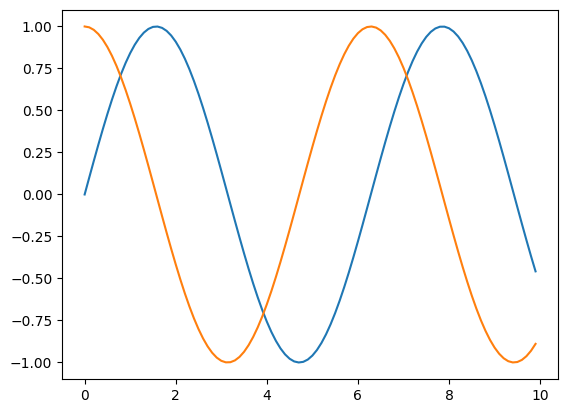

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
x = torch.arange(0.0,10.0,0.1)
x.requires_grad_(True)
x1 = x.detach()
y1 = torch.sin(x1)
y2 = torch.sin(x)
y2.sum().backward()
plt.plot(x1,y1)
plt.plot(x1,x.grad)

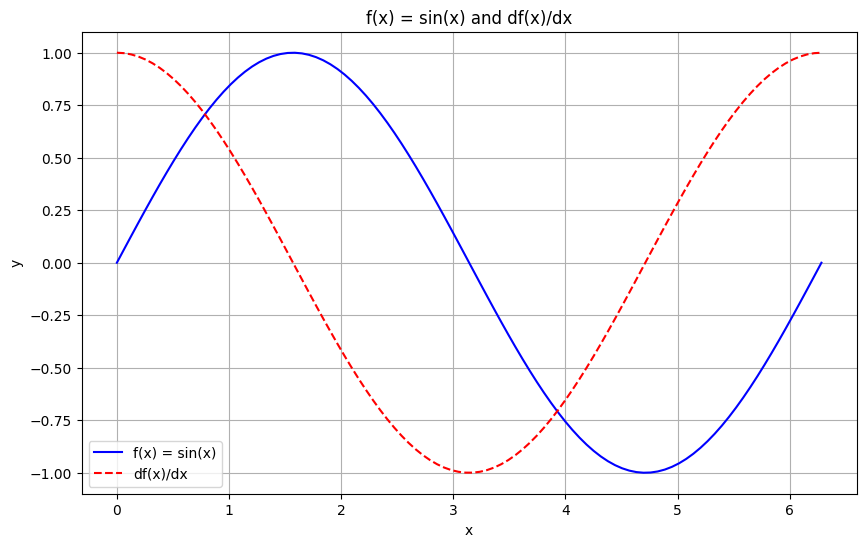

In [73]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 定义 x 的范围，并设置 requires_grad=True 以启用自动微分
x = torch.linspace(0, 2 * np.pi, 100, requires_grad=True)

# 定义函数 f(x) = sin(x)
f_x = torch.sin(x)

# 通过自动微分计算 df(x)/dx
# 这里 torch.ones_like(x) 是用来确保梯度计算覆盖每个样本。
f_x.backward(torch.ones_like(x))
df_dx = x.grad

# 将张量转换为 numpy 数组以便使用 Matplotlib 进行绘图
x_np = x.detach().numpy()
f_x_np = f_x.detach().numpy()
df_dx_np = df_dx.detach().numpy()

# 使用 Matplotlib 绘制 f(x) 和 df(x)/dx 的图像
plt.figure(figsize=(10, 6))
plt.plot(x_np, f_x_np, label='f(x) = sin(x)', color='blue')
plt.plot(x_np, df_dx_np, label="df(x)/dx", color='red', linestyle='--')
plt.title('f(x) = sin(x) and df(x)/dx')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [80]:
# f_x.backward() # RunTimeError: grad can be implicitly created only for scalar outputs
# 必须要同一个维度才可以求导，否则就像下面的例子一样标量求导

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

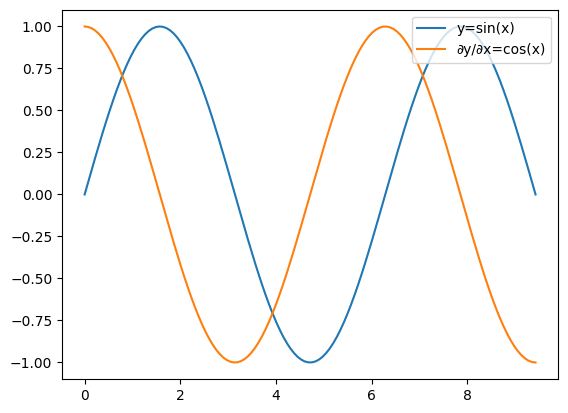

In [76]:
import numpy as np
x = torch.linspace(0, 3*np.pi, 128)
x.requires_grad_(True)
y = torch.sin(x)  # y = sin(x)

y.sum().backward()

plt.plot(x.detach(), y.detach(), label='y=sin(x)') 
plt.plot(x.detach(), x.grad, label='∂y/∂x=cos(x)')  # dy/dx = cos(x)
plt.legend(loc='upper right')
plt.show()